## Linear classifier

For more information see chapter 4

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem: Iris classification

For this notebook a linear classifier will be used in the iris dataset in order to classify different plants

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Deep Learning/Data Sets/PyTorch/iris.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<AxesSubplot:xlabel='target', ylabel='count'>

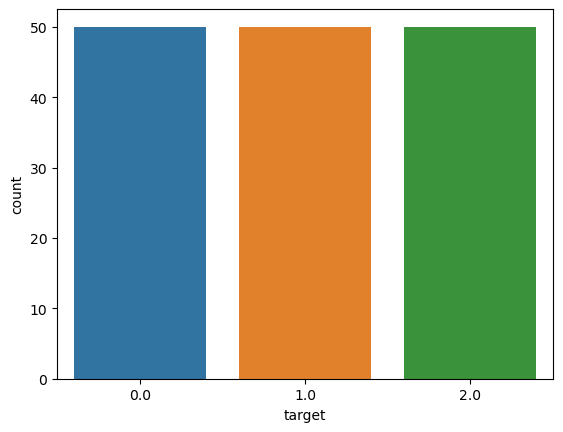

In [3]:
sns.countplot(data=df, x="target")

#### 1. DataLoader

In [4]:
class CustomDataLoader:
    def __init__(self, data, target, val_size=0.3, test_size=0.2, batch_size=64):  
        self.batch_size = batch_size
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(data.values, target.values, test_size=val_size, random_state=42)
        self.X_val, self.X_test, self.y_val, self.y_test = train_test_split(self.X_val, self.y_val, test_size=test_size, random_state=42)

        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.X_val)
        self.X_test = self.scaler.transform(self.X_test)

    def get_data_loaders(self):
        train_dataset = TensorDataset(torch.tensor(self.X_train, dtype=torch.float32),
            torch.tensor(self.y_train, dtype=torch.long))
        val_dataset = TensorDataset(torch.tensor(self.X_val, dtype=torch.float32),
            torch.tensor(self.y_val, dtype=torch.long))
        test_dataset = TensorDataset(torch.tensor(self.X_test, dtype=torch.float32),
            torch.tensor(self.y_test, dtype=torch.long))
        
        
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)

        return train_loader, val_loader, test_loader



X = df.drop(columns="target")
y = df["target"]
custom_loader = CustomDataLoader(X, y)
train_loader, val_loader, test_loader = custom_loader.get_data_loaders()

#### 2. Model

In [5]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        y_pred = F.log_softmax(x, dim=1)
        return y_pred

In [6]:
model = Model(in_features=X.shape[1], out_features=y.nunique())
print(model)

Model(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)


#### 3. The Loss function and optimizer

The cross-entropy loss function, often used in classification tasks, is defined as follows:

$$CE = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$

Where:
- $n$ is the number of samples.
- $y_i$ is the true label (0 or 1) for the $i$-th sample.
- $\hat{y}_i$ is the predicted probability that the $i$-th sample belongs to class 1.

For binary classification using a linear model, you can typically use a logistic function to predict probabilities:

$$ \hat{y}_i = \sigma(wx_i + b) $$

Where $ \sigma $ is the sigmoid function.


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

#### 4. Train the model

Epoch 1/5000, Train Loss: 1.5435, Test Loss: 1.5872


Epoch 101/5000, Train Loss: 1.2655, Test Loss: 1.2569
Epoch 201/5000, Train Loss: 1.0691, Test Loss: 1.0274
Epoch 301/5000, Train Loss: 0.9318, Test Loss: 0.8711
Epoch 401/5000, Train Loss: 0.8341, Test Loss: 0.7634
Epoch 501/5000, Train Loss: 0.7626, Test Loss: 0.6877
Epoch 601/5000, Train Loss: 0.7081, Test Loss: 0.6321
Epoch 701/5000, Train Loss: 0.6653, Test Loss: 0.5899
Epoch 801/5000, Train Loss: 0.6307, Test Loss: 0.5569
Epoch 901/5000, Train Loss: 0.6020, Test Loss: 0.5304
Epoch 1001/5000, Train Loss: 0.5778, Test Loss: 0.5085
Epoch 1101/5000, Train Loss: 0.5570, Test Loss: 0.4901
Epoch 1201/5000, Train Loss: 0.5390, Test Loss: 0.4743
Epoch 1301/5000, Train Loss: 0.5231, Test Loss: 0.4606
Epoch 1401/5000, Train Loss: 0.5090, Test Loss: 0.4486
Epoch 1501/5000, Train Loss: 0.4965, Test Loss: 0.4379
Epoch 1601/5000, Train Loss: 0.4852, Test Loss: 0.4283
Epoch 1701/5000, Train Loss: 0.4749, Test Loss: 0.4195
Epoch 1801/5000, Train Loss: 0.4656, Test Loss: 0.4116
Epoch 1901/5000, Tr

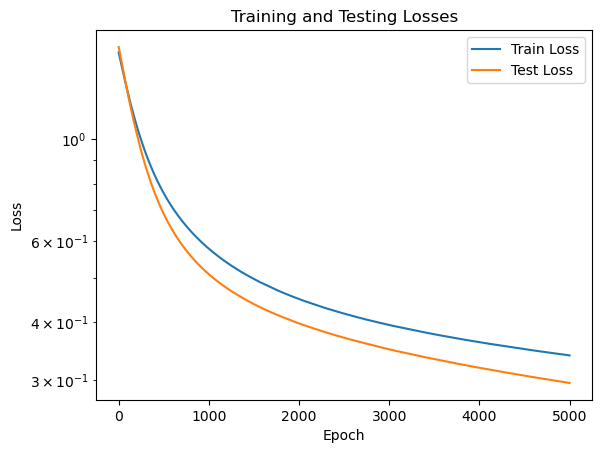

[[3 0 0]
 [0 1 0]
 [0 2 3]]


In [8]:
class Trainer:
    def __init__(self, model, optimizer, criterion, train_loader, val_loader):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.train_loader = train_loader
        self.val_loader = val_loader
    
    def train(self, max_epochs):
        self.train_losses = []
        self.val_losses = []

        # Training
        for epoch in range(max_epochs):
            self.model.train
            train_loss = 0

            for inputs, labels in self.train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item() * inputs.size(0)
            train_loss /= len(self.train_loader.dataset)
            self.train_losses.append(train_loss)

            # Validation
            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for inputs, labels in self.val_loader:
                    outputs = self.model(inputs)
                    loss = self.criterion(outputs.squeeze(), labels)
                    val_loss += loss.item() * inputs.size(0)
                val_loss /= len(self.val_loader.dataset)
            self.val_losses.append(val_loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch+1}/{max_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {val_loss:.4f}')
 
        return self.model
    
    def plot_losses(self, train_losses, test_losses):
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.yscale('log')  # Set y-axis scale to logarithmic
        plt.title('Training and Testing Losses')
        plt.legend()
        plt.show()
    
    def evaluation(self, model, test_loader):
        model.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs.squeeze())
                outputs = torch.max(outputs,1)[1]
        print(confusion_matrix(outputs.view(-1), labels.view(-1)))
                    

trainer = Trainer(model, optimizer, criterion, train_loader, val_loader)   
model = trainer.train(int(5e3))      
trainer.plot_losses(trainer.train_losses, trainer.val_losses)
trainer.evaluation(model, test_loader)